# Fruit or Vegatable?
From the point of view of biology and botanic a tomato is a fruit, but from the point of view of food it is commonly considered a vegetable.

So how to distinguish between culinary fruit and vegetables? We will train a simple linear binary classification with the aim to distinguish culinary fruit from vegatables taking in account the fact it is botanically a fruit, the fact that it grows on tree or not, the fact that it grows underground or not, and nutritional informations.

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import RidgeClassifier
import matplotlib.pyplot as plt

Read input database (nutritional informations taken from ANSES-CIQUAL 2020, https://data.europa.eu/data/datasets/5369a15fa3a729239d2065b7)

In [2]:
df = pd.read_csv('db.csv')

Print size of dataframe and training set

In [3]:
(df.shape[0], training_size := int(.7 * df.shape[0]))

(114, 79)

In [4]:
df.head()

,alim_nom_eng,Culinary Fruit or Vegetable,Botanical fruit,Grows on tree,Grows underground,Water (g/100g),Protein (g/100g),Carbohydrate (g/100g),Fat (g/100g),Sugars (g/100g),...,Vitamin K1 (µg/100g),Vitamin K2 (µg/100g),Vitamin C (mg/100g),Vitamin B1 or Thiamin (mg/100g),Vitamin B2 or Riboflavin (mg/100g),Vitamin B3 or Niacin (mg/100g),Vitamin B5 or Pantothenic acid (mg/100g),Vitamin B6 (mg/100g),Vitamin B9 or Folate (µg/100g),Vitamin B12 (µg/100g)
0,"Avocado, pulp, raw",F,1,1,0,70.3,1.56,0.83,20.60,0.4,...,14.50,0,0.50,0.052,0.037,1.56,1.07,0.170,70.4,0
1,"Swiss chard, raw",V,0,0,0,95.4,1.00,1.63,0.50,1.2,...,0.80,0,3.08,0.015,0.015,0.10,0.20,0.036,24.7,0
2,"Carrot, raw",V,0,0,1,88.1,0.63,7.59,0.50,6.0,...,2.96,0,2.05,0.028,0.010,0.10,0.20,0.093,59.4,0
3,"Curly endive, raw",V,0,0,0,92.9,1.48,2.40,0.25,0.7,...,298.00,0,18.50,0.070,0.088,0.45,1.03,0.063,126.0,0
4,"Red cabbage, raw",V,0,0,0,90.7,1.13,4.33,0.50,3.9,...,6.41,0,18.70,0.036,0.010,0.12,0.24,0.140,31.9,0


Prepare data to training:

In [5]:
while True:
  df = df.sample(frac=1) #shuffle
  
  X = df[df.columns[2:]].to_numpy() # discard name
  y = df[df.columns[1]].map(lambda t: t == 'V').to_numpy() # cast Vegatable/Fruit enum to boolean
  
  X_training, X_test = X[:training_size], X[training_size:]
  y_training, y_test = y[:training_size], y[training_size:]
  
  n_veg = y_training.sum();
  if abs(training_size - 2*n_veg)/(training_size) < 1/4: # shuffle until fruits and vegetables are balanced
    break

## Test 1
Train with linear binary classification

In [6]:
clf = RidgeClassifier().fit(X_training, y_training)
clf.score(X_training, y_training) # training error

0.9746835443037974

In [7]:
clf.score(X_test, y_test) # test error

0.9714285714285714

In [8]:
def plot_coef(clf, n=5): # plot most influent features
  coef = abs(clf.coef_[0])
  idx = coef >= sorted(coef)[-n]

  fig,ax = plt.subplots()
  ax.bar(df.columns[2:][idx], clf.coef_[0][idx])
  ax.set_ylabel('← Fruit | Vegetable →')
  fig.autofmt_xdate(rotation=45)
  plt.show()

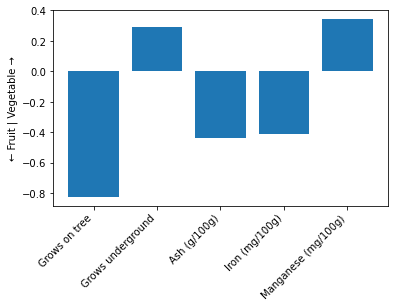

In [9]:
plot_coef(clf) # plot most influent features

It seems that usually if it grows on a tree it is considered a fruit (obviously there are some exceptions, e.g. watermelon), and if it grows underground it is a vegetable.

## Test 2
Remove (put to zero) all features except nutritional values

In [10]:
X_training[:,:4] = 0

In [11]:
clf = RidgeClassifier().fit(X_training, y_training)
clf.score(X_training, y_training) # training error

0.9620253164556962

In [12]:
clf.score(X_test, y_test) # test error

0.9428571428571428

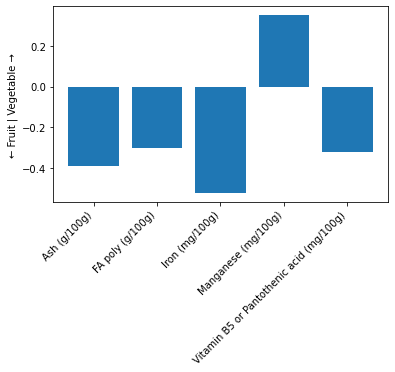

In [13]:
plot_coef(clf) # plot most important features

If it has manganese it could be a vegetable, otherwise with iron a fruit.

I expected that fructose was an important feature to identify fruit and I am very surprised to not see it here.